In [40]:
import numpy as np
import scipy.spatial.distance as dista
import glob
import math
import matplotlib.pyplot as plt
from PIL import Image
from scipy.linalg import hadamard
%matplotlib inline
import random

In [41]:
def Hadamard_Code(n = 8):
    """
    Cria um código de Hamadard.

    :param n: Dimensão da matriz de Hamadard inicial.
    :returns: Matriz de dimensão 2n x n em que cada linha é uma palavra código.
    """
    h = hadamard(n)
    H = np.concatenate((h,-h),  axis=0)
    C = []
    for i in range(2*n):
        C.append([ 0 if H[i][j] == -1 else 1 for j in range(n) ])
    return C

def is_Hadamard_codeword(v, C):
    """
    Verifica se um vetor de dimensão n é palavra código num código de Hamadard
    construído com uma matriz de Hamadard de dimensão n.

    :param v: Vetor de dimensão n.
    :returns: Valor booleano indicando se v é palavra código.
    """
    return v in C

def correct_message_Hadamard(r, C, n):
    """
    Corrige uma palavra código se possível num código Hamadard.

    :param r: Vetor de dimensão n.
    :param C: Matriz com as palavras código.
    :param n: Dimensão das palavras código.
    :returns: Palavra código corrigída.
    """
    # Menor distância encontrada (inicializada com valor alto).
    d = n
    # Índice associado à menor distância.
    k = -1
    for i in range(n + n):
        currdist = n - sum([ 1 if r[j] == C[i][j] else 0 for j in range(n) ])
        if currdist < d:
            d = currdist
            k = i
    if d >= n/4:
        print ("Erro: Vetor não pode ser corrigído!")
        return -1
    else:
        return C[k]

def to_codewords(A, C):
    """
    Converte todos os pontos de uma matriz em palavras código.

    :param A: Matriz a ser convertida.
    :param C: Palavras código do código de Hamming.
    :returns: Matriz A cujos elementos são palavras código de C.
    """
    E = []
    for i in range(len(A)):
        Ei = []
        for j in range(len(A[i])):
            Ei.append(C[(A[i][j])-1])
        E.append(Ei)
    return E

def from_codewords(E, C):
    """
    Converte uma matriz com palavras código nos elementos originais.

    :param E: Matriz cujos elementos são palavras código.
    :param C: Palavras código do código de Hadamard.
    :returns: Matriz original (antes de ser aplicada a função to_codewords).
    """
    D = []
    for i in range(len(E)):
        Di = []
        for j in range(len(E[i])):
            idx = [ k for k in range(len(C)) if E[i][j] == C[k] ]
            if len(idx) == 0:
                s = ""
                for x in range(len(E[i][j])):
                    s = s + str(E[i][j][x])
                Di.append(int(s,2) % 256)
            else:
                Di.append(idx[0] + 1)
        D.append(Di)
    return D

def gen_noise(E, n):
    """
    Gera ruído na mensagem enviada.

    :param E: Matriz a enviar.
    :param n: Dimensão dos vetores elementos de E.
    :returns: E com ruído.
    """
    R = []
    for i in range(len(E)):
        Ri = []
        for j in range(len(E[i])):
            k = random.randint(0, n//4 - 1)
            l = [ z for z in range(0, n) ]; random.shuffle(l)
            Ri.append([ E[i][j][x] if x not in l[:k] else 1 - E[i][j][x] for x in range(0, n) ])
        R.append(Ri)
    return R

def correct_block(R, C, n):
    """
    Corrige um bloco com possível ruído.

    :param R: Vetor recebido.
    :param C: Matriz com as palavras código.
    :returns: Vetor corrigido.
    """
    CV = []
    for i in range(len(R)):
            CV.append([ R[i][j] if is_Hadamard_codeword(R[i][j], C) else correct_message_Hadamard(R[i][j], C, n) for j in range(len(R[i])) ])
    return CV

In [42]:
base = [Image.open(r"C:\Users\X560UD\OneDrive\Acadêmico\Uminho\MMC\Teoria de Códigos\Trabalho\S1\1.jpg").convert('L')]
base

[<PIL.Image.Image image mode=L size=225x169 at 0x1E80536EBE0>]

In [43]:
X = np.array(Image.open(r"C:\Users\X560UD\OneDrive\Acadêmico\Uminho\MMC\Teoria de Códigos\Trabalho\S1\1.jpg").convert('L'));X

array([[167, 169, 168, ..., 177, 170, 162],
       [169, 168, 169, ..., 145, 141, 141],
       [171, 169, 170, ..., 143, 164, 165],
       ...,
       [104, 104, 104, ..., 118, 166, 165],
       [105, 105, 105, ...,  49, 102, 167],
       [105, 106, 107, ...,  62,  56,  98]], dtype=uint8)

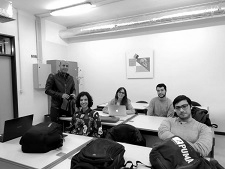

In [44]:
Image.fromarray(X)


In [45]:
C = Hadamard_Code(128)

In [46]:
Foto_Codificada = to_codewords(X,C); #Foto_Codificada[1]

In [47]:
len(Foto_Codificada)

169

In [48]:
Foto_Ruido = gen_noise(Foto_Codificada, 128)

In [49]:
X = from_codewords(Foto_Ruido, C)

In [50]:
Img = np.asarray(X)


In [51]:
Img1 = Img.astype(np.uint8)

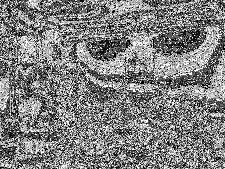

In [52]:
Image.fromarray(Img1)

In [53]:
CV = correct_block(Foto_Ruido, C, 128)

In [54]:
Imagem_Corrigida = from_codewords(CV,C)

In [55]:
Img_Corrigida1 = np.asarray(Imagem_Corrigida)

In [56]:
Img_Final = Img_Corrigida1.astype(np.uint8)

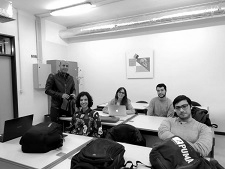

In [57]:
Image.fromarray(Img_Final)

In [122]:
#Imagem corrigida